In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [ ]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url + match

In [9]:
url

'https://understat.com/match/18499'

In [10]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml' )
scripts = soup.find_all('script')

In [11]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22518224\x22,\x22minute\x22\x3A\x2243\x22,\x22result\x22\x3A\x22MissedShots\x22,\x22X\x22\x3A\x220.9109999847412109\x22,\x22Y\x22\x3A\x220.73\x22,\x22xG\x22\x3A\x220.042466919869184494\x22,\x22player\x22\x3A\x22Kamaldeen\x20Sulemana\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x229630\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222022\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2218499\x22,\x22h_team\x22\x3A\x22Southampton\x22,\x22a_team\x22\x3A\x22Manchester\x20City\x22,\x22h_goals\x22\x3A\x221\x22,\x22a_goals\x22\x3A\x224\x22,\x22date\x22\x3A\x222023\x2D04\x2D08\x2016\x3A30\x3A00\x22,\x22player_assisted\x22\x3A\x22Romeo\x20Lavia\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22518226\x22,\x22minute\x22\x

In [12]:
strings = scripts[1].string

In [13]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22518224\\x22,\\x22minute\\x22\\x3A\\x2243\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.9109999847412109\\x22,\\x22Y\\x22\\x3A\\x220.73\\x22,\\x22xG\\x22\\x3A\\x220.042466919869184494\\x22,\\x22player\\x22\\x3A\\x22Kamaldeen\\x20Sulemana\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x229630\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222022\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2218499\\x22,\\x22h_team\\x22\\x3A\\x22Southampton\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x224\\x22,\\x22date\\x22\\x3A\\x222023\\x2D04\\x2D08\\x2016\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Romeo\\x20Lavia\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22518226\\x22,\\x22minute\\x22\\x3A\\x2248\\x22,\\x22resul

In [16]:
#eliminamos las cosas innecesarias del pirnicpio y del final
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

#covertimos strings en formato json
data = json.loads(json_data)

In [17]:
data

{'h': [{'id': '518224',
   'minute': '43',
   'result': 'MissedShots',
   'X': '0.9109999847412109',
   'Y': '0.73',
   'xG': '0.042466919869184494',
   'player': 'Kamaldeen Sulemana',
   'h_a': 'h',
   'player_id': '9630',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'RightFoot',
   'match_id': '18499',
   'h_team': 'Southampton',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '4',
   'date': '2023-04-08 16:30:00',
   'player_assisted': 'Romeo Lavia',
   'lastAction': 'Pass'},
  {'id': '518226',
   'minute': '48',
   'result': 'MissedShots',
   'X': '0.9109999847412109',
   'Y': '0.519000015258789',
   'xG': '0.11159227043390274',
   'player': 'Armel Bella Kotchap',
   'h_a': 'h',
   'player_id': '9710',
   'situation': 'SetPiece',
   'season': '2022',
   'shotType': 'Head',
   'match_id': '18499',
   'h_team': 'Southampton',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '4',
   'date': '2023-04-08 16:30:00',
   'player_assisted'

In [18]:
x = []
y = []
xG = []
result = []
team = []
player = []
shotType = []
minute = []
lastAction = []
situation = []
player_assisted = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])            
        if key == 'shotType':
            shotType.append(data_home[index][key])            
        if key == 'minute':
            minute.append(data_home[index][key])            
        if key == 'lastAction':
            lastAction.append(data_home[index][key]) 
        if key == 'situation':
            situation.append(data_home[index][key])  
        if key == 'player_assisted':
            player_assisted.append(data_home[index][key])            

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'shotType':
            shotType.append(data_away[index][key]) 
        if key == 'minute':
            minute.append(data_away[index][key])  
        if key == 'lastAction':
            lastAction.append(data_away[index][key])
        if key == 'situation':
            situation.append(data_away[index][key])
        if key == 'player_assisted':
            player_assisted.append(data_away[index][key]) 

In [24]:
result

['MissedShots',
 'MissedShots',
 'BlockedShot',
 'Goal',
 'SavedShot',
 'BlockedShot',
 'SavedShot',
 'MissedShots',
 'Goal',
 'MissedShots',
 'BlockedShot',
 'SavedShot',
 'Goal',
 'SavedShot',
 'Goal',
 'Goal',
 'BlockedShot']

In [26]:
col_names = ['x','y','xg','team','player','shotType','result','minute','lastAction','situation','player_assisted']

df = pd.DataFrame([x,y,xG,team,player,shotType,result,minute,lastAction,situation,player_assisted], index = col_names)
df = df.T

In [32]:
df

,x,y,xg,team,player,shotType,result,minute,lastAction,situation,player_assisted
0,0.9109999847412109,0.73,0.042466919869184494,Southampton,Kamaldeen Sulemana,RightFoot,MissedShots,43,Pass,OpenPlay,Romeo Lavia
1,0.9109999847412109,0.519000015258789,0.11159227043390274,Southampton,Armel Bella Kotchap,Head,MissedShots,48,Cross,SetPiece,James Ward-Prowse
2,0.735999984741211,0.3890000152587891,0.014559057541191578,Southampton,Mohamed Elyounoussi,RightFoot,BlockedShot,53,BallTouch,OpenPlay,Kamaldeen Sulemana
3,0.8730000305175781,0.4979999923706055,0.3241825997829437,Southampton,Sékou Mara,RightFoot,Goal,71,Pass,OpenPlay,Moussa Djenepo
4,0.87,0.66,0.06300204247236252,Manchester City,Jack Grealish,RightFoot,SavedShot,4,Pass,OpenPlay,Ilkay Gündogan
5,0.845,0.515,0.05754367634654045,Manchester City,Ilkay Gündogan,RightFoot,BlockedShot,14,HeadPass,FromCorner,Riyad Mahrez
6,0.9630000305175781,0.325,0.009039298631250858,Manchester City,Ilkay Gündogan,Head,SavedShot,31,Cross,FromCorner,Kevin De Bruyne
7,0.9780000305175781,0.4279999923706055,0.07566142827272415,Manchester City,Erling Haaland,Head,MissedShots,40,Aerial,OpenPlay,None
8,0.9519999694824218,0.49599998474121093,0.5902573466300964,Manchester City,Erling Haaland,Head,Goal,44,Cross,OpenPlay,Kevin De Bruyne
9,0.9109999847412109,0.705999984741211,0.08328281342983246,Manchester City,Ilkay Gündogan,RightFoot,MissedShots,50,TakeOn,OpenPlay,None


In [34]:
haaland = df[df['player'] == 'Erling Haaland']
haaland

,x,y,xg,team,player,shotType,result,minute,lastAction,situation,player_assisted
7,0.9780000305175781,0.4279999923706055,0.07566142827272415,Manchester City,Erling Haaland,Head,MissedShots,40,Aerial,OpenPlay,None
8,0.9519999694824218,0.49599998474121093,0.5902573466300964,Manchester City,Erling Haaland,Head,Goal,44,Cross,OpenPlay,Kevin De Bruyne
14,0.9280000305175782,0.45099998474121095,0.468636691570282,Manchester City,Erling Haaland,LeftFoot,Goal,67,Chipped,OpenPlay,Jack Grealish


In [28]:
import matplotlib as plt
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

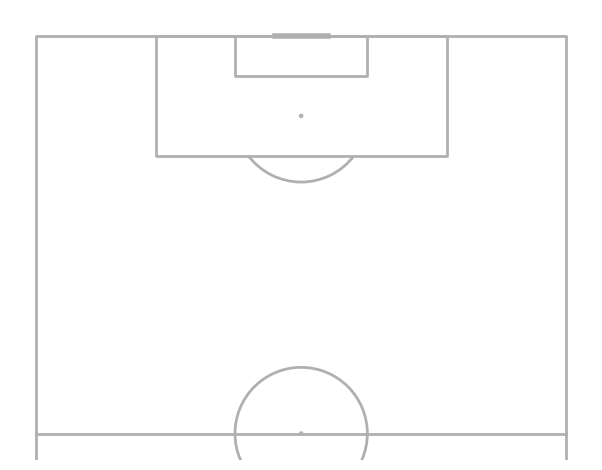

In [30]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()